Setup Complete!
Dataset loaded successfully.

Original columns: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

Data processed into a standard format ('label', 'text'). Here's a preview:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset Info after processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB

Displaying class distribution...


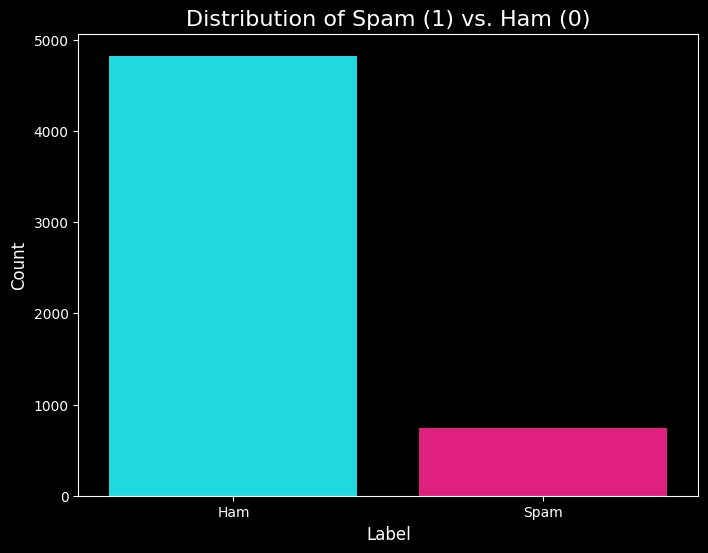


Preprocessing 5572 messages. This might take a moment...
Text cleaning complete. Here's a preview:
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  

TF-IDF Vectorization complete.
Shape of feature matrix (X): (5572, 5000)
Shape of target vector (y): (5572,)

--- Training Multinomial Naive Bayes ---
Accuracy: 0.9695
Classification Report:
              precision    recall  f1-sco

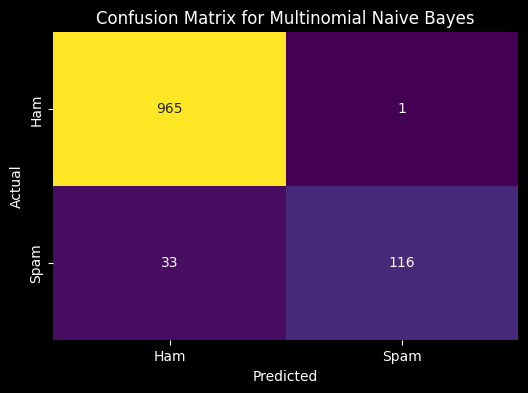


--- Training Logistic Regression ---
Accuracy: 0.9659
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.75      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



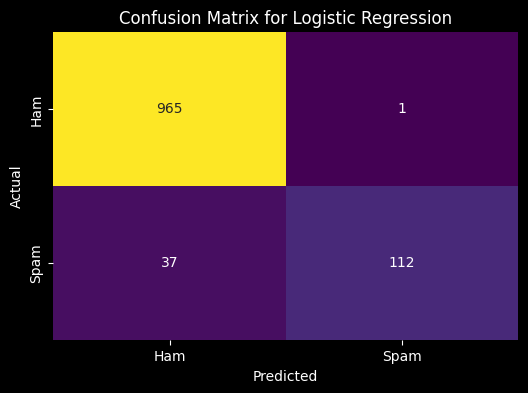


--- Training Support Vector Machine ---
Accuracy: 0.9848
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



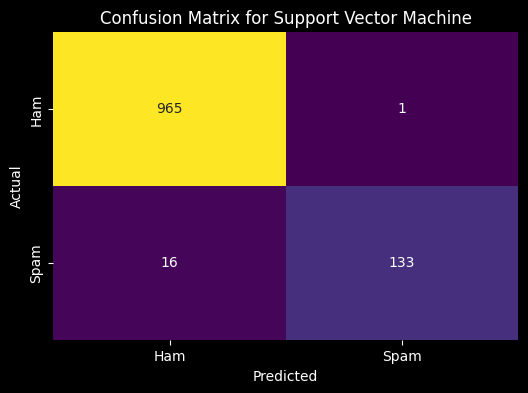


Best performing model is: SVC with an accuracy of 0.9848

Saving the best model and the TF-IDF vectorizer...
Best model saved as 'model.pkl'
TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =============================================================================
# Step 1: Setup and Library Imports
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import pickle
import warnings

warnings.filterwarnings('ignore')

# Download necessary NLTK data (punkt for tokenization, stopwords for cleaning)
print("Downloading NLTK data...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

print("Setup Complete!")

# =============================================================================
# Step 2: Robust Dataset Handling & EDA
# =============================================================================
# You can upload your 'spam.csv' file using the file explorer on the left side of Colab.
# Make sure the filename matches exactly.
file_name = 'spam.csv'

try:
    # Load the dataset with 'latin1' encoding which is common for this dataset
    df_raw = pd.read_csv(file_name, encoding='latin1')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: The file '{file_name}' was not found.")
    print("Please make sure you have uploaded the file to your Colab session and the filename is correct.")
    # Stop execution if file is not found
    exit()

# --- Robust Data Cleaning and Column Selection ---
# This new section makes the code more reliable.
# It assumes the first column is the label and the second is the text.
print("\nOriginal columns:", df_raw.columns.tolist())
df = pd.DataFrame({
    'label': df_raw.iloc[:, 0],
    'text': df_raw.iloc[:, 1]
})

print("\nData processed into a standard format ('label', 'text'). Here's a preview:")
print(df.head())


# Map labels to numerical values (0 for 'ham', 1 for 'spam')
# The code checks if the label is 'spam' and assigns 1, otherwise 0.
df['label'] = df['label'].apply(lambda x: 1 if x.lower() == 'spam' else 0)

print("\nDataset Info after processing:")
df.info()

# Display label distribution to see the balance between spam and ham
print("\nDisplaying class distribution...")
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette=['#00F6FF', '#FF007F'])
plt.title('Distribution of Spam (1) vs. Ham (0)', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# =============================================================================
# Step 3: Text Preprocessing & Feature Engineering
# =============================================================================
# Initialize the Porter Stemmer and English stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    This function cleans the input text by:
    1. Removing all non-alphabetic characters.
    2. Converting text to lowercase.
    3. Tokenizing the text into words.
    4. Removing stopwords and applying stemming.
    """
    # Remove special characters and digits
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = text.split()
    # Stemming and removing stopwords
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

print(f"\nPreprocessing {len(df)} messages. This might take a moment...")

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

print("Text cleaning complete. Here's a preview:")
print(df[['text', 'cleaned_text']].head())

# --- Feature Extraction using TF-IDF ---
# This converts the cleaned text into a matrix of numerical features.
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Use top 5000 most frequent words
X = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['label']

print("\nTF-IDF Vectorization complete.")
print("Shape of feature matrix (X):", X.shape)
print("Shape of target vector (y):", y.shape)

# =============================================================================
# Step 4: Model Building, Training & Evaluation
# =============================================================================
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models to train for comparison
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Support Vector Machine": SVC(kernel='linear')
}

best_model = None
best_accuracy = 0.0

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Check if this is the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Plot a confusion matrix to visualize performance
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print(f"\nBest performing model is: {best_model.__class__.__name__} with an accuracy of {best_accuracy:.4f}")

# =============================================================================
# Step 5: Save the Best Model and Vectorizer for the Web App
# =============================================================================
print("\nSaving the best model and the TF-IDF vectorizer...")

# Save the best model as model.pkl
with open('model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
print("Best model saved as 'model.pkl'")

# Save the fitted TF-IDF vectorizer as tfidf_vectorizer.pkl
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")


# Provide an easy way to download the files from Google Colab
try:
    from google.colab import files
    print("\nDownloading files to your local machine...")
    files.download('model.pkl')
    files.download('tfidf_vectorizer.pkl')
except ImportError:
    print("\nCould not automatically download files. Please download them from the Colab file explorer (folder icon on the left).")